This notebook is reproducing figure 4 of the manuscript 'Multi-year simulations at kilometre scale with the Integrated
2 Forecasting System coupled to FESOM2.5/NEMOv3.4'

https://doi.org/10.5194/egusphere-2024-913

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import pickle
import pandas as pd

In [2]:
# Load data (deserialize)
with open('figure4_TOA_data.pickle', 'rb') as handle:
    models_toa = pickle.load(handle)

with open('figure4_TOA_data_panel_b.pickle', 'rb') as handle:
    models_toa_panel_b = pickle.load(handle)

with open('figure4_GSAT_data.pickle', 'rb') as handle:
    models_temp = pickle.load(handle)

with open('figure4_CERES_IV_data.pickle', 'rb') as handle:
    TOA_ceres_diff_samples_gm = pickle.load(handle)

with open('figure4_CERES_clim_data.pickle', 'rb') as handle:
    TOA_ceres_clim_gm = pickle.load(handle)

with open('figure4_CERES_timeseries_data.pickle', 'rb') as handle:
    TOA_ceres_ebaf_gm = pickle.load(handle)

with open('figure4_ERA5_gm_data.pickle', 'rb') as handle:
    era5_gm = pickle.load(handle)




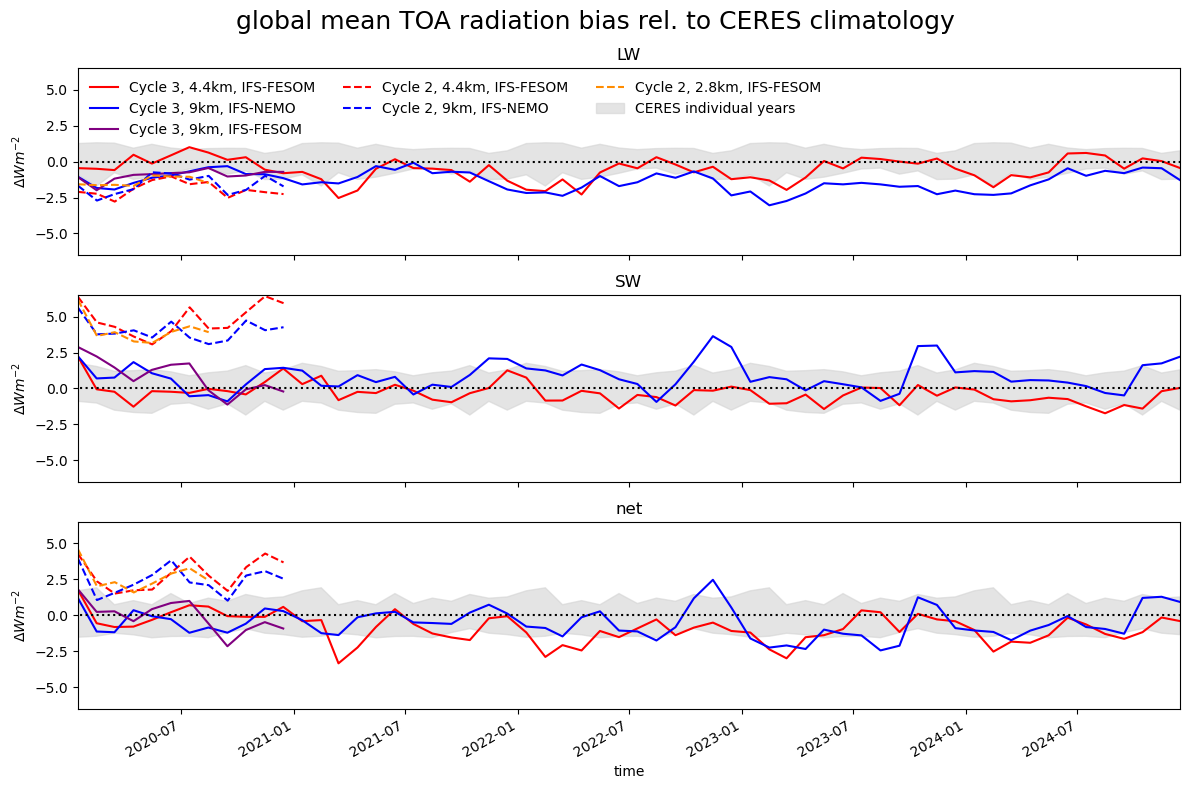

In [3]:
fig, axes = plt.subplots(3, 1,figsize=(12,8))
linecolors = ['#ff0000',  
            '#0000ff',  
            'purple',  
            '#ff0000',  
            '#0000ff',  
            'darkorange']  

linestyles=['solid',  
'solid',  
'solid',  
'dashed',  
'dashed',  
'dashed']  


linelabels = ['Cycle 3, 4.4km, IFS-FESOM',  
                'Cycle 3, 9km, IFS-NEMO',  
                'Cycle 3, 9km, IFS-FESOM',  
                'Cycle 2, 4.4km, IFS-FESOM',  
                'Cycle 2, 9km, IFS-NEMO',  
                'Cycle 2, 2.8km, IFS-FESOM'  
                ]  



# duplicate CERES internal variability sampels and concatenate years to plot one connected envelope for internal variability uncertainty
shading_data = xr.concat((TOA_ceres_diff_samples_gm, 
                          TOA_ceres_diff_samples_gm.assign_coords(time=models_toa[0].ttr.sel(time='2021').time),
                          TOA_ceres_diff_samples_gm.assign_coords(time=models_toa[0].ttr.sel(time='2022').time),
                          TOA_ceres_diff_samples_gm.assign_coords(time=models_toa[0].ttr.sel(time='2023').time),
                          TOA_ceres_diff_samples_gm.assign_coords(time=models_toa[0].ttr.sel(time='2024').time),
                         ),dim='time' )
long_time=np.append(shading_data['time'],shading_data['time'][::-1])


# subplot 1

for i,model in enumerate(models_toa):
    if len(model.time)>=60:
        xr.concat(((model.ttr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().ttr.values),
                   (model.ttr.sel(time='2021')-TOA_ceres_clim_gm.squeeze().ttr.values),
                   (model.ttr.sel(time='2022')-TOA_ceres_clim_gm.squeeze().ttr.values),
                   (model.ttr.sel(time='2023')-TOA_ceres_clim_gm.squeeze().ttr.values),
                   (model.ttr.sel(time='2024')-TOA_ceres_clim_gm.squeeze().ttr.values)),
                  dim='time').plot(ax=axes[0],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')
    elif len(model.time)==8:
        xr.concat((model.ttr.sel(time='2020')-TOA_ceres_clim_gm.isel(time=slice(0,8)).squeeze().ttr.values),
          dim='time').plot(ax=axes[0],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')
    else:
        xr.concat((model.ttr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().ttr.values),
          dim='time').plot(ax=axes[0],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')

axes[0].fill(long_time,np.append(shading_data['ttr'].min(dim='ensemble'),shading_data['ttr'].max(dim='ensemble')[::-1]),color='lightgrey',alpha=0.6,label='CERES individual years',zorder=0)


axes[0].set_title('LW',fontsize=16)
axes[0].set_xticklabels([])
axes[0].set_xlabel('')
axes[0].legend(loc="upper left",frameon=False,fontsize='medium',ncol=3)

# subplot 2
for i,model in enumerate(models_toa):
    if len(model.time)>=60:
        xr.concat(((model.tsr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().tsr.values),
                   (model.tsr.sel(time='2021')-TOA_ceres_clim_gm.squeeze().tsr.values),
                   (model.tsr.sel(time='2022')-TOA_ceres_clim_gm.squeeze().tsr.values),
                   (model.tsr.sel(time='2023')-TOA_ceres_clim_gm.squeeze().tsr.values),
                   (model.tsr.sel(time='2024')-TOA_ceres_clim_gm.squeeze().tsr.values)),
                  dim='time').plot(ax=axes[1],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')
    elif len(model.time)==8:
        xr.concat((model.tsr.sel(time='2020')-TOA_ceres_clim_gm.isel(time=slice(0,8)).squeeze().tsr.values),
          dim='time').plot(ax=axes[1],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')
    else:
        xr.concat((model.tsr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().tsr.values),
          dim='time').plot(ax=axes[1],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')


axes[1].fill(long_time,np.append(shading_data['tsr'].min(dim='ensemble'),shading_data['tsr'].max(dim='ensemble')[::-1]),color='lightgrey',alpha=0.6,label='CERES individual years',zorder=0)

axes[1].set_title('SW',fontsize=16)
axes[1].set_xticklabels([])
axes[1].set_xlabel('')

# subplot 3
for i,model in enumerate(models_toa):
    if len(model.time)>=60:
        xr.concat(((model.tnr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().tnr.values),
                   (model.tnr.sel(time='2021')-TOA_ceres_clim_gm.squeeze().tnr.values),
                   (model.tnr.sel(time='2022')-TOA_ceres_clim_gm.squeeze().tnr.values),
                   (model.tnr.sel(time='2023')-TOA_ceres_clim_gm.squeeze().tnr.values),
                   (model.tnr.sel(time='2024')-TOA_ceres_clim_gm.squeeze().tnr.values)),
                  dim='time').plot(ax=axes[2],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')
    elif len(model.time)==8:
        xr.concat((model.tnr.sel(time='2020')-TOA_ceres_clim_gm.isel(time=slice(0,8)).squeeze().tnr.values),
          dim='time').plot(ax=axes[2],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')

    else:
        xr.concat((model.tnr.sel(time='2020')-TOA_ceres_clim_gm.squeeze().tnr.values),
          dim='time').plot(ax=axes[2],color=linecolors[i],label=linelabels[i],linestyle=linestyles[i],x='time')

axes[2].fill(long_time,np.append(shading_data['tnr'].min(dim='ensemble'),shading_data['tnr'].max(dim='ensemble')[::-1]),color='lightgrey',alpha=0.6,label='CERES individual years',zorder=0)
axes[2].set_title('net',fontsize=16)

for i in range(3):
    axes[i].set_ylabel('$W/m^2$')
    axes[i].set_xlim([pd.to_datetime('2020-01-15'),pd.to_datetime('2024-12-15')])
    axes[i].plot([pd.to_datetime('2020-01-01'),pd.to_datetime('2030-12-31')],[0,0],color='black',linestyle=':')
    axes[i].set_ylim([-6.5,6.5])



axes[0].set_title('LW')
axes[1].set_title('SW')
axes[2].set_title('net')

for i in range(3):
    axes[i].set_ylabel('$\Delta Wm^{-2}$')

plt.suptitle('global mean TOA radiation bias rel. to CERES climatology',fontsize=18)
plt.tight_layout()    

plt.savefig('figure4_panel_a.png')

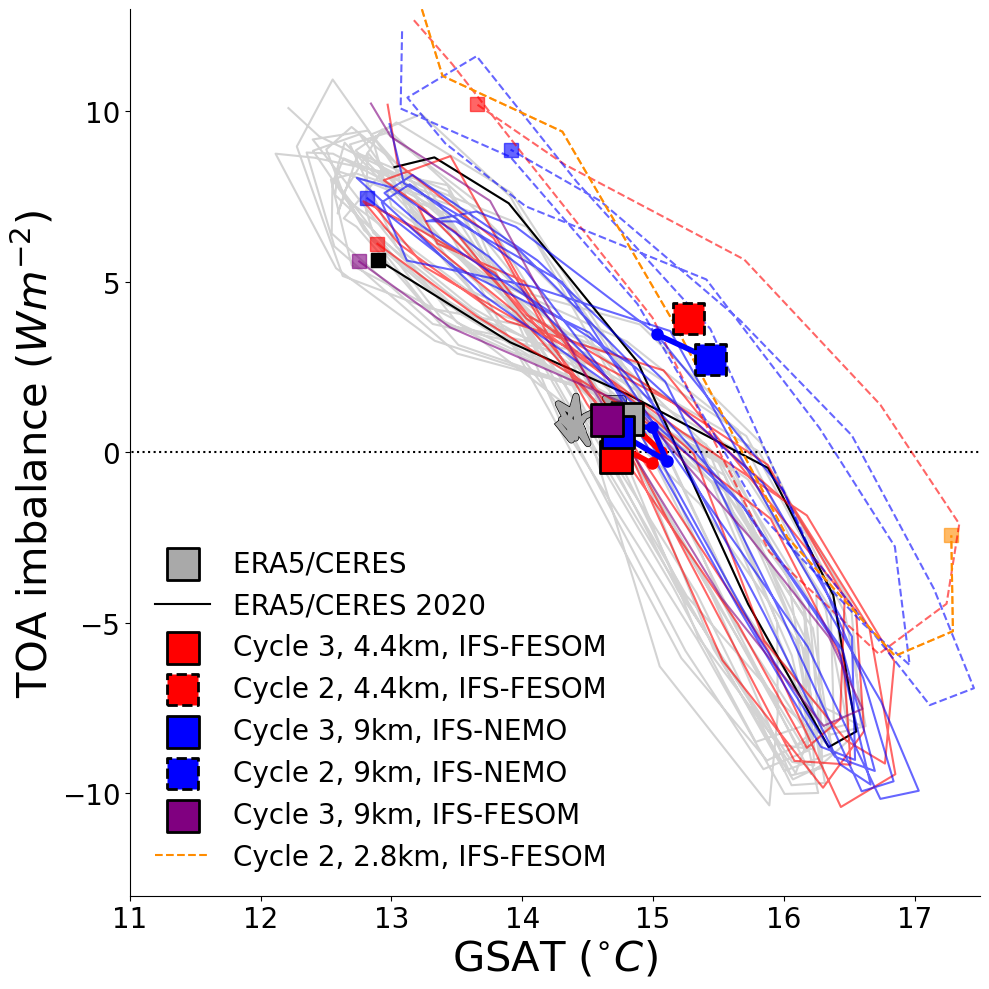

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
linecolors = ['#ff0000',  
            '#ff0000',  
              '#0000ff',  
            '#0000ff',
              'purple',  
            'darkorange']  


linestyles=['solid',  
            'dashed',
            'solid',  
            'dashed',
            'solid',
            'dashed']  

linelabels = ['Cycle 3, 4.4km, IFS-FESOM',  
'Cycle 3, 9km, IFS-NEMO',  
'Cycle 3, 9km IFS-FESOM',  
'Cycle 2, 4.4km, IFS-FESOM',  
'Cycle 2, 9km, IFS-NEMO',  
'Cycle 2, 2.8km IFS-FESOM'  
]  


linelabels = ['Cycle 3, 4.4km, IFS-FESOM',  
              'Cycle 2, 4.4km, IFS-FESOM',
              'Cycle 3, 9km, IFS-NEMO',  
              'Cycle 2, 9km, IFS-NEMO',  
              'Cycle 3, 9km, IFS-FESOM',  
              'Cycle 2, 2.8km, IFS-FESOM'  
                ]  





small_fonts = 20
large_fonts = small_fonts*1.5
lw = 2

# ERA5
x=era5_gm.sel(time=slice('2001','2020')).squeeze()-273.15
y=TOA_ceres_ebaf_gm.tnr.sel(time=slice('2001','2020')).squeeze()
x_ym = x.groupby('time.year').mean(dim='time')
y_ym = y.groupby('time.year').mean(dim='time')
plt.plot(x,y,color='lightgrey',label='')
plt.plot(x_ym,y_ym,color='black',linewidth=5,label='')
plt.plot(x_ym,y_ym,color='darkgrey',linewidth=4,label='')
plt.scatter(x_ym[-1],y_ym[-1],marker='s',s=500,color='darkgrey',zorder=40,label='ERA5/CERES ',edgecolors='k',linewidth=2) # large square for annual mean of the final year
plt.plot(x[-1],y[-1],'s',markersize=10,color='lightgrey')

# ERA5 2020
x=era5_gm.sel(time='2020').squeeze()-273.15
y=TOA_ceres_ebaf_gm.tnr.sel(time='2020').squeeze()
x_ym = x.groupby('time.year').mean(dim='time')
y_ym = y.groupby('time.year').mean(dim='time')
plt.plot(x,y,color='black',label='ERA5/CERES 2020')
plt.plot(x[-1],y[-1],'s',markersize=10,color='black')


# plot all models from list:

for i,model in enumerate(models_toa_panel_b):
    x=models_temp[i]
    y=models_toa_panel_b[i]
    x_ym = x.groupby('time.year').mean(dim='time')
    y_ym = y.groupby('time.year').mean(dim='time')
    plt.plot(x,y,color=linecolors[i],linestyle=linestyles[i],label='',zorder=20, alpha=0.6) # thin line for monthly means
    plt.plot(x[-1],y[-1],'s',markersize=10,color=linecolors[i], alpha=0.6) # small square marking last monthly mean in simulation

    if i==len(models_toa)-1:
        pass
    else:        
        plt.plot(x_ym,y_ym,color=linecolors[i],linewidth=4,label='',zorder=39) # solid line for annual means
        plt.plot(x_ym,y_ym,'.',color=linecolors[i],markersize=16,label='',zorder=39) # dots for each annual mean

        plt.scatter(x_ym[-1],y_ym[-1],marker='s',s=500,color=linecolors[i],zorder=41,label=linelabels[i],edgecolors='k',linewidth=2,linestyle=linestyles[i]) # large square for annual mean of the final year


plt.plot(x,y,color=linecolors[i],linestyle=linestyles[i],label=linelabels[i],zorder=20, alpha=1)



plt.tick_params(axis='x', labelsize=small_fonts )
plt.tick_params(axis='y', labelsize=small_fonts )

plt.plot([0,18],[0,0],color='black',linestyle=':')
plt.ylabel('TOA imbalance ($Wm^{-2}$)',fontsize=large_fonts )

plt.xlabel('GSAT ($^{\circ}C$)',fontsize=large_fonts )

plt.legend(fontsize=small_fonts,loc='lower left',frameon=False)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xlim([11,17.5])
plt.ylim([-13,13])
plt.tight_layout()
plt.savefig('figure4_panel_b.png',dpi=500)